<a href="https://colab.research.google.com/github/1994shuklaanand/FLIPKART-DATA-ANALYSIS/blob/main/FLIPCART_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [5]:
%pip install nltk

In [6]:
data=pd.read_csv('/content/flipkart cleaned data.csv')

In [43]:
data1=pd.read_excel('/content/flipkart_cleaned_data2.xlsx')

In [30]:
data.head()

,Unnamed: 0,crawl_timestamp,product_name,product_category_tree,retail_price,discounted_price,product_rating,overall_rating,brand
0,0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,No rating available,No rating available,Alisha
1,1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,No rating available,No rating available,FabHomeDecor
2,2,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,No rating available,No rating available,AW
3,3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,No rating available,No rating available,Alisha
4,4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,No rating available,No rating available,Sicons


In [13]:
data1.head()

,crawl_timestamp,product_name,retail_price,discounted_price,product_rating,overall_rating,brand,category
0,2016-03-25,Alisha Solid Women's Cycling Shorts,999.0,379.0,No rating available,No rating available,Alisha,Clothing
1,2016-03-25,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,No rating available,No rating available,FabHomeDecor,Furniture
2,2016-03-25,AW Bellies,999.0,499.0,No rating available,No rating available,AW,Footwear
3,2016-03-25,Alisha Solid Women's Cycling Shorts,699.0,267.0,No rating available,No rating available,Alisha,Clothing
4,2016-03-25,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,No rating available,No rating available,Sicons,Pet Supplies


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   crawl_timestamp   20000 non-null  datetime64[ns]
 1   product_name      20000 non-null  object        
 2   retail_price      19922 non-null  float64       
 3   discounted_price  19922 non-null  float64       
 4   product_rating    20000 non-null  object        
 5   overall_rating    20000 non-null  object        
 6   brand             14136 non-null  object        
 7   category          20000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.2+ MB


In [17]:
data1.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [18]:
data1.isnull().describe()

,crawl_timestamp,product_name,retail_price,discounted_price,product_rating,overall_rating,brand,category
count,20000,20000,20000,20000,20000,20000,20000,20000
unique,1,1,2,2,1,1,2,1
top,False,False,False,False,False,False,False,False
freq,20000,20000,19922,19922,20000,20000,14136,20000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20002 non-null  int64  
 1   crawl_timestamp        20000 non-null  object 
 2   product_name           20000 non-null  object 
 3   product_category_tree  20000 non-null  object 
 4   retail_price           19922 non-null  float64
 5   discounted_price       19922 non-null  float64
 6   product_rating         20000 non-null  object 
 7   overall_rating         20000 non-null  object 
 8   brand                  14136 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [19]:
import matplotlib.pyplot as plt


<Axes: >

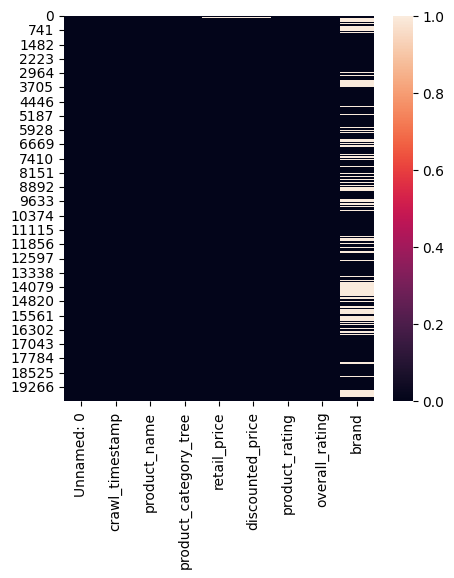

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull())

In [21]:
# drop unimportnt columns

In [25]:
data1.drop(['image'],axis=1,inplace=True)

KeyError: ignored

In [27]:
data1.drop(['is_FK_Advantage_product'],axis=1,inplace=True)

KeyError: ignored

In [29]:
data.drop(['description'],axis=1,inplace=True)

KeyError: ignored

In [32]:
# Replace 'column_name' with the name of the column you want to check for float values
column_name = "product_category_tree"

# Drop rows with float values in the specified column
data= data.drop(data[data[column_name].apply(lambda x: isinstance(x, float))].index)

In [33]:
import pandas as pd
import re

In [34]:
# A function to Clean the product_category_tree and return Primary_Category
def clean_prod_category():
  primary_category=[]
  #iterate in col
  for ele in data['product_category_tree']:
    ele=ele.replace('"]',"")
    category=ele[2:].split(" >>")
    primary_category.append(category[0])

  #returinig the clean data
  return primary_category

In [35]:
primary_category=clean_prod_category()

#Verfying the output
primary_category

['Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Eternal Gandhi Super Series Crystal Paper Weight...',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Furniture',
 'Pet Supplies',
 'Clothing',
 'Clothing',
 'Footwear',
 'Pet Supplies',
 'Clothing',
 'Sports & Fitness',
 'Beauty and Personal Care',
 'Clothing',
 'Clothing',
 'Bengal Blooms Rose Artificial Plant  with Pot (3...',
 'Clothing',
 'Pens & Stationery',
 'Pens & Stationery',
 'Pens & Stationery',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Bags, Wallets & Belts',
 'Clothing',
 'Footwear',
 'Home Decor & Festive Needs',
 'Automotive',
 'Tools & Hardware',
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Anarkali Kurta",
 'BuildTrack PIR Wireless Motion Sensor - One Swit...',
 'Skayvon SUMMERSIBLE SINGL

In [36]:
data.head(5)

,Unnamed: 0,crawl_timestamp,product_name,product_category_tree,retail_price,discounted_price,product_rating,overall_rating,brand
0,0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,No rating available,No rating available,Alisha
1,1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,No rating available,No rating available,FabHomeDecor
2,2,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,No rating available,No rating available,AW
3,3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,No rating available,No rating available,Alisha
4,4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,No rating available,No rating available,Sicons


In [37]:
data['category']=primary_category

In [39]:
data1.head(5)

,crawl_timestamp,product_name,retail_price,discounted_price,product_rating,overall_rating,brand,category
0,2016-03-25,Alisha Solid Women's Cycling Shorts,999.0,379.0,No rating available,No rating available,Alisha,Clothing
1,2016-03-25,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,No rating available,No rating available,FabHomeDecor,Furniture
2,2016-03-25,AW Bellies,999.0,499.0,No rating available,No rating available,AW,Footwear
3,2016-03-25,Alisha Solid Women's Cycling Shorts,699.0,267.0,No rating available,No rating available,Alisha,Clothing
4,2016-03-25,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,No rating available,No rating available,Sicons,Pet Supplies


In [40]:
data.drop(['product_category_tree'],axis=1,inplace=True)

In [41]:
data.head(5)

,Unnamed: 0,crawl_timestamp,product_name,retail_price,discounted_price,product_rating,overall_rating,brand,category
0,0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,999.0,379.0,No rating available,No rating available,Alisha,Clothing
1,1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,No rating available,No rating available,FabHomeDecor,Furniture
2,2,2016-03-25 22:59:23 +0000,AW Bellies,999.0,499.0,No rating available,No rating available,AW,Footwear
3,3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,699.0,267.0,No rating available,No rating available,Alisha,Clothing
4,4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,No rating available,No rating available,Sicons,Pet Supplies
